## 1. 핵심 이론 및 수식 설명 (물리학적 상사성)

### 1-1 Positional Encoding:결정 격자의 위상 정보 주입

트랜스포머는 데이터를 한 번에 병렬로 처리하므로 단어의 '순서' 정보가 유실됩니다. 이를 보존하기 위해 각 토큰의 위치($pos$)에 고유한 위상 값을 더해줍니다.

- 물리적 비유: 결정학에서 원자의 위치를 '퓨어리어 시리즈(Fourier series)로 기술하여 회절 패턴을 분석하는 것과 같습니다.

- 수식:
$$PE_{(pos, 2i)} = \sin(pos / 10000^{2i/d_{model}})$$$$
PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i/d_{model}})$$

서로 다른 주파수의 사인/코사인 함수를 사용하여, 모델이 상대적인 위치 관계를 선형 변환으로 쉽게 학습할 수 있게 합니다.

트랜스포머(Transformer) 논문에서 제안된 위치 인코딩(Positional Encoding) 수식의 각 요소에 대한 상세 설명은 다음과 같습니다

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fc08NZL%2FbtsQaSqMio7%2FAAAAAAAAAAAAAAAAAAAAAFVOuAPuIYgYdcpBRhlKVYB6IkD5PL7YgeLxLRDHU1mF%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1769871599%26allow_ip%3D%26allow_referer%3D%26signature%3DNzCX7hyWToRaNW3Ha07eubpHXEg%253D' width=700>

### 1-2. 수식 구성 요소 설명

- $PE$ (Positional Encoding)

    - 입력 임베딩에 더해질 위치 정보 벡터의 결과값입니다2. 이 값은 단어의 원래 의미를 담은 임베딩 벡터와 같은 차원을 가지며, 두 벡터를 더함으로써 모델이 단어의 위치를 인식하게 합니다.

- $pos$ (Position)

    - 문장(시퀀스) 내에서 해당 단어의 절대적인 위치 인덱스입니다
    - (예: 첫 번째 단어는 0, 두 번째 단어는 1...)

- $i$ (Dimension index)

    - 모델의 임베딩 벡터 내부에서 각 성분이 위치하는 차원 인덱스입니다.
    - $i$는 0부터 $d_{model}/2 - 1$까지의 값을 가집니다.
    
- $2i$ 및 $2i+1$
    - 벡터의 인덱스가 짝수($2i$)일 때는 사인(sine) 함수를, 홀수($2i+1$)일 때는 코사인(cosine) 함수를 사용함을 의미합니다.

- $d_{model}$
    - 모델이 사용하는 전체 임베딩 차원의 수입니다 (논문의 기본 설정은 512입니다).

- $10000$
    - 주파수(Frequency) 범위를 결정하는 상수입니다.
    - 이 수식에 의해 파장(Wavelength)은 $2\pi$에서 $10000 \cdot 2\pi$까지 기하급수적인 수열(Geometric progression)을 이루며 늘어나게 됩니다.

### 1-3. 수식의 설계 의도 및 의미

- 상대적 위치 학습:
    - 저자들은 특정 오프셋(offset) $k$에 대하여 $PE_{pos+k}$가 $PE_{pos}$의 선형 함수로 표현될 수 있다는 점 때문에 이 함수를 선택했습니다.
    - 이는 모델이 단어들 사이의 상대적인 위치 관계를 더 쉽게 학습할 수 있게 돕습니다.

- 차원별 주기의 변화
    - 인덱스 $i$가 커질수록(즉, 벡터의 뒤쪽 차원으로 갈수록) 분모가 커지므로 주기가 길어집니다.
    - 이는 마치 시계의 초침, 분침, 시침이 서로 다른 속도로 회전하며 시간을 나타내는 것과 유사하게, 각 차원이 서로 다른 해상도의 위치 정보를 담게 합니다.

- 길이의 확장성(Extrapolation)
    - 학습 과정에서 보지 못했던, 학습 데이터보다 더 긴 문장이 들어오더라도 삼각함수의 주기적 특성을 이용해 위치 정보를 유연하게 부여할 수 있습니다.

이 수식을 통해 생성된 위치 벡터는 입력 임베딩과 합산되어, 순환 구조(RNN)가 없는 트랜스포머 모델이 단어의 순서와 거리를 수학적으로 계산할 수 있는 토대를 제공합니다.

### 1-4. 복소 지수함수(Exponential) 형태의 재구성

파동방정식이 익숙하다면, '오일러 공식(Euler's Formula)'인

$e^{i\theta} = \cos\theta + i\sin\theta$

를 활용하면, 사인과 코사인으로 분리된 위치 인코딩 수식을 하나의 복소 지수함수(Complex Exponential) 형태로 통합하여 기술할 수 있습니다.

이는 물리학적으로 위상 기하학적 관점에서 위치 정보를 해석하는 데 매우 유용합니다.

먼저, 각 차원($i$)에 따른 각진동수(Angular frequency) 혹은 파수(Wave number)에 해당하는 항을 $\omega_i$로 정의하겠습니다.

$$\omega_i = \frac{1}{10000^{2i/d_{model}}}$$

이때, 문장 내 위치 $pos$에서의위치 인코딩 쌍 $(PE_{(pos, 2i)}, PE_{(pos, 2i+1)})$ 1은 다음과 같이 하나의 복소수 위상($\psi$)으로 통합될 수 있습니다.

$$\psi(pos, i) = e^{j(\omega_i \cdot pos)} = \cos(\omega_i \cdot pos) + j \sin(\omega_i \cdot pos)$$

(여기서 $j$는 허수 단위입니다.)

논문에서 정의한 인덱스 규칙($2i$는 $\sin$, $2i+1$은 $\cos$)에 대입하면 다음과 같이 써볼 수 있습니다.

$$\begin{aligned}
PE_{(pos, 2i+1)} + j PE_{(pos, 2i)} &= \exp\left(j \frac{pos}{10000^{2i/d_{model}}}\right) \\
&= e^{j \theta_{pos, i}}
\end{aligned}$$

### 1-5. 물리적 의미 분석 (양자역학 및 파동 역학적 관점)

수식을 지수함수 형태로 변환하면 다음과 같은 전문가적 통찰을 얻을 수 있습니다.

- 위상 회전(Phase Rotation)
    - 위치 $pos$가 증가함에 따라, 복소 평면 위에서 단위 원을 따라 위상이 회전하는 것으로 이해할 수 있습니다.
    - 각 차원 $i$는 이 회전의 '속도'를 결정하며, 이는 고체물리학에서 '역격자 공간(Reciprocal Space)'의 파동 벡터 $k$와 유사한 역할을 수행합니다.

- 유니타리 변환(Unitary Transformation)
    - 지수함수 형태는 크기가 1인 복소수이므로, 입력 벡터에 가해지는 변환이 정보의 손실 없이 위치에 따른 위상만 변화시키는 유니타리 연산임을 명확히 보여줍니다.

- 상대적 위치 보존
    - 두 위치 $pos$와 $pos+k$ 사이의 관계는 복소 지수함수의 성질에 의해 위상차($\Delta \theta$)만으로 기술됩니다.

$$e^{j\omega(pos+k)} = e^{j\omega \cdot pos} \cdot e^{j\omega \cdot k}$$

이는 모델이 선형 변환만으로도 단어 간의 상대적 거리를 에너지 준위나 위상 간섭의 형태로 쉽게 학습할 수 있게 만드는 수학적 근거가 됩니다.

### 1-6. Scaled Dot-Product Attention: 양자 상태 관측 및 기댓값 산출

현재 분석 중인 단어($Q$)와 주변 단어들($K$) 사이의 상호작용을 계산하여 중요한 정보($V$)를 추출합니다.

- 물리적 비유: $QK^T$ 내적은 상태 간의 중첩(Overlap) 정도를 나타내는 확률 진폭을 구하는 과정이며, Softmax는 이를 '확률 밀도(Probability density)'로 변환합니다. 최종 출력은 시스템의 '기댓값(Expectation value)'을 산출하는 연산과 수학적으로 동일합니다.

- 수식:
$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

여기서 $\sqrt{d_k}$로 나누는 Scaling은 자유도($d_k$)가 커질 때 내적값이 발산하여 확률 분포가 특정 상태에 고착(Saturation)되는 것을 방지하는 정규화 장치입니다.

- $Q$ (Query, 쿼리): 현재 시점에서 **"무엇에 집중할 것인가?"**라는 질문을 던지는 주체입니다1111. 논문에서는 분석하고자 하는 현재 토큰의 표현 벡터를 의미합니다.

- $K$ (Key, 키): 쿼리의 질문에 답하기 위해 각 단어들이 들고 있는 "이름표" 또는 **"색인"**입니다222. 쿼리와 키 사이의 유사도를 측정하여 각 단어의 중요도를 결정합니다.

- $V$ (Value, 벨류): 각 단어가 가진 "실제 정보" 또는 **"의미적 내용"**입니다333. 어텐션 점수가 높은 단어의 벨류값이 결과에 더 많이 반영됩니다.

- $d_k$: 키($K$)와 쿼리($Q$) 벡터의 차원 수입니다. 수식에서는 이 값의 제곱근($\sqrt{d_k}$)으로 나누어 스케일링을 수행합니다5.+1

### 1-7. 연산 단계별 물리적·수학적 의미

- $QK^T$ (내적 연산, MatMul)
    - 의미: 쿼리와 모든 키 사이의 상관관계를 계산합니다.
    - 물리적 비유: 두 상태 벡터 간의 중첩(Overlap) 정도를 구하는 과정입니다. 내적값이 클수록 두 단어는 서로 밀접한 관련이 있음을 나타냅니다.

- $\frac{1}{\sqrt{d_k}}$ (스케일링, Scale)
    - 의미: 내적값이 차원이 커짐에 따라 지나치게 커지는 것을 방지하는 정규화 장치입니다.
    - 이유: 내적값이 너무 커지면 Softmax 함수에서 기울기가 매우 작아지는(Gradient Vanishing) 영역으로 빠지게 되어 학습이 방해받기 때문입니다. 물리학적으로는 시스템의 에너지가 발산하지 않도록 안정화하는 과정과 유사합니다.

- $\text{softmax}(\cdot)$ (확률 밀도 함수)
    - 의미: 스케일링된 점수들을 합이 1(100%)이 되는 '확률값(Attention Weight)'으로 변환합니다.
    - 물리적 비유: 시스템 내에서 특정 상태가 관측될 '확률 밀도(Probability density)'를 결정하는 과정입니다.
    
- $\dots V$ (가중치 적용)
    - 의미: 계산된 확률(중요도)을 실제 정보($V$)에 곱하여 최종적인 문맥 벡터(Context Vector)를 산출합니다1
    - 결과: 최종 출력은 각 상태가 가진 정보량의 '기댓값(Expectation value)'과 수학적으로 동일한 형태를 가집니다.

# 1. 라이브러리 임포트 및 환경 설정

가장 먼저 필요한 도구들을 불러오고 실험의 기준점을 잡습니다.

In [ ]:
import torch # 파이토치의 가장 기본이 되는 라이브러리로, 텐서(Tensor) 연산을 담당합니다.
import torch.nn as nn # 신경망(Neural Network)을 만들기 위한 다양한 도구(층, 함수 등)가 들어있습니다.
import torch.nn.functional as F # 자주 쓰이는 수학 함수(Softmax, ReLU 등)를 담고 있습니다.
import math # 제곱근(sqrt)이나 로그(log) 같은 표준 수학 연산을 위해 가져옵니다.
import matplotlib.pyplot as plt # 결과를 그래프로 시각화하여 눈으로 확인하기 위해 사용합니다.
import numpy as np # 행렬 연산 및 그래프 데이터 처리를 돕는 라이브러리입니다.

# [중요] 랜덤 시드 2026 설정 -> 재현성 확보
def set_seed(seed=2026):
    torch.manual_seed(seed) # CPU 연산 시 시드 고정
    torch.cuda.manual_seed_all(seed) # GPU 연산 시 시드 고정
    np.random.seed(seed) # 넘파이 연산 시 시드 고정
    torch.backends.cudnn.deterministic = True # 연산 알고리즘을 결정론적으로 고정
    torch.backends.cudnn.benchmark = False # 무작위성 배제를 위해 벤치마크 모드 해제

set_seed(2026) # 시드 2026 동일하게 적용

## 2. 위치 인코딩 (Positional Encoding) 구현

트랜스포머는 문장 전체를 한꺼번에 읽기 때문에, 단어의 '순서'를 알 수 없습니다. 이를 해결하기 위해 각 단어 벡터에 고유한 '위상(Phase)' 정보를 더해줍니다.

In [ ]:
class CustomPositionalEncoding(nn.Module):
    # nn.Module을 상속받는 이유: 이 클래스가 파이토치의 '신경망 부품'임을 선언하여
    # 나중에 모델을 저장하거나 학습할 때 파이토치가 관리할 수 있게 하기 위함입니다.

    def __init__(self, d_model, max_len=5000):
        """
        d_model: 단어를 표현하는 숫자의 개수 (시스템의 자유도)
        max_len: 이 모델이 한 번에 처리할 수 있는 최대 문장 길이
        """
        # 부모인 nn.Module의 초기화 과정을 실행합니다.
        super(CustomPositionalEncoding, self).__init__()

        # 1. 위치 정보를 저장할 '도화지'를 만듭니다. (모든 값이 0인 행렬)
        pe = torch.zeros(max_len, d_model)

        # 2. 문장 내에서의 실제 위치(0, 1, 2...)를 세로 벡터로 만듭니다.
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        # 3. 주파수를 결정하는 항을 계산합니다. (10000은 논문에서 정한 상수입니다.)
        # 뒤쪽 차원으로 갈수록 숫자가 변하는 속도(주파수)가 느려집니다.
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # 4. 짝수 번째 칸에는 사인(sin) 파동을 넣습니다.
        pe[:, 0::2] = torch.sin(position * div_term)

        # 5. 홀수 번째 칸에는 코사인(cos) 파동을 넣습니다.
        pe[:, 1::2] = torch.cos(position * div_term)

        # 6. 한꺼번에 여러 문장(Batch)을 처리할 수 있도록 차원을 하나 늘려줍니다. (1, max_len, d_model)
        pe = pe.unsqueeze(0)

        # register_buffer: 이 값은 인공지능이 스스로 학습해서 바꾸는 값이 아니라
        # 고정된 물리 법칙(삼각함수)처럼 사용될 것이라고 파이토치에 알려주는 기능입니다.
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        x: 입력된 단어들의 묶음 (배치 크기, 문장 길이, 차원)
        """
        # 원래 단어 정보에 우리가 만든 '위상(위치) 지문'을 단순히 더해줍니다. (파동의 중첩)
        x = x + self.pe[:, :x.size(1)]
        return x

# 3. 스케일 점곱 어텐션 (Scaled Dot-Product Attention) 구현

단어들 사이의 상관관계(Overlap)를 계산하여, 어떤 정보를 얼마나 가져올지 결정하는 핵심 연산입니다.

In [ ]:
class CustomAttention(nn.Module):
    def __init__(self):
        super(CustomAttention, self).__init__()

    def forward(self, Q, K, V, mask=None):
        """
        Q (Query): 질문 - "나는 어떤 정보를 찾고 있는가?"
        K (Key): 이름표 - "나는 어떤 정보를 가지고 있는가?"
        V (Value): 실제 정보 - "나의 진짜 의미는 무엇인가?"

        >> Q, K, V의 올바른 역할 정의
            Q (Query): 질문자 (현재 단어)
                "나는 지금 '사과'라는 단어야. 나랑 문맥적으로 관련 있는 정보를 다른 단어들 중에서 찾고 싶어."
                따라서 "나는 어떤 정보를 찾고 있는가?"라는 설명이 정확합니다.

            K (Key): 이름표/인덱스 (비교 대상이 되는 모든 단어들)
                "나는 '포도'고 과일 카테고리 정보를 가지고 있어", "나는 '의자'고 가구 정보를 가지고 있어."
                각 단어가 자신이 어떤 속성을 가졌는지 노출하는 '색인' 역할을 하므로, "나는 어떤 정보를 가지고 있는가?"가 맞습니다.

            V (Value): 실제 값 (추출될 정보의 본체)
                Q와 K의 유사도가 높게 나오면(예: 사과와 포도), 그 단어가 가진 '진짜 의미(정보)'를 결과값에 반영합니다.

        """
        # 1. 차원의 크기를 구합니다. (루트 d_k로 나누기 위함)
        d_k = Q.size(-1)

        # 2. 쿼리와 키를 행렬 곱(Dot-product)하여 유사도 점수를 냅니다.
        # 물리학적으로는 두 상태의 '중첩(Overlap)' 정도를 구하는 것과 같습니다.
        # math.sqrt(d_k)로 나누는 이유는 점수가 너무 커져서 학습이 멈추는 것을 막는 안전장치입니다.
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)

        # 3. 마스킹(Mask): PAD처럼 무시해야 할 단어는 아주 작은 값(-1e9)으로 채워
        # 나중에 확률이 0이 되도록 만듭니다.
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        # 4. 소프트맥스(Softmax): 점수들을 모두 더해서 1(100%)이 되는 확률값으로 바꿉니다.
        # 이것이 바로 '어텐션 가중치(Attention Weight)'입니다.
        attn_weights = F.softmax(scores, dim=-1)

        # 5. 가중치만큼 실제 정보(Value)를 가져옵니다.
        # 결과물은 모든 정보를 중요도에 따라 섞은 '기댓값'이 됩니다.
        return torch.matmul(attn_weights, V)

# 4. 멀티-헤드 어텐션 (Multi-Head Attention) 구현

정보를 8개의 서로 다른 시각(Head)으로 나누어 병렬로 분석한 뒤 다시 합치는 고차원적인 처리 모듈입니다.

In [ ]:
class CustomMultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        """
        d_model: 전체 차원 (예: 128)
        n_heads: 관찰자의 수 (예: 8)
        """
        super(CustomMultiHeadAttention, self).__init__()
        # 전체 차원은 반드시 머리 개수로 나누어 떨어져야 공평하게 나눌 수 있습니다.
        assert d_model % n_heads == 0, "d_model을 n_heads로 나눌 수 없습니다."

        self.d_model = d_model
        self.n_heads = n_heads
        self.d_k = d_model // n_heads # 각 관찰자가 담당할 작은 차원 (128 / 8 = 16)

        # Q, K, V를 만들기 위해 입력 데이터를 변신시킬 3개의 선형 층입니다.
        self.w_q = nn.Linear(d_model, d_model)
        self.w_k = nn.Linear(d_model, d_model)
        self.w_v = nn.Linear(d_model, d_model)

        # 마지막에 여러 명의 의견을 하나로 합쳐줄 최종 선형 층입니다.
        self.fc = nn.Linear(d_model, d_model)

        # 위에서 만든 어텐션 연산 부품을 가져옵니다.
        self.attention_engine = CustomAttention()

    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)

        # 1. 데이터를 Q, K, V로 변신시킵니다.
        # 그 후, 8개의 머리가 각각 자기 몫을 볼 수 있게 형태를 바꿉니다. (View & Transpose)
        # 결과 형태: (배치, 8명, 문장길이, 16차원)
        Q = self.w_q(q).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)
        K = self.w_k(k).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)
        V = self.w_v(v).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)

        # 2. 8개의 머리가 각자 독립적으로 어텐션을 수행합니다. (병렬 연산)
        x = self.attention_engine(Q, K, V, mask=mask)

        # 3. 8명의 결과를 다시 하나로 길게 이어 붙입니다. (Concatenate)
        # transpose와 contiguous를 써서 메모리 상의 순서를 정리해줍니다.
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)

        # 4. 마지막으로 최종 선형 층을 통과시켜 결과를 완성합니다.
        return self.fc(x)

# 5. 결과 비교 및 검증 (Custom vs PyTorch)

우리가 만든 모듈과 PyTorch 공식 모듈(nn.MultiheadAttention)의 결과가 시드 2026에서 완벽히 일치하는지 확인합니다.

- nn.Transformer (전체 시스템)
    - 이 어텐션 부품을 포함하여, Feed-Forward 네트워크, Layer Normalization, Residual Connection 등을 모두 조립해 놓은 완성된 기계입니다.

- nn.MultiheadAttention (부품)
    - 트랜스포머의 심장부인 어텐션 연산(Q, K, V 내적 및 Softmax)만을 수행하는 단위 레이어입니다. 박사님께서 직접 구현하신 클래스가 여기에 해당합니다.

시드 2026 기반 최대 오차: 0.000000000000


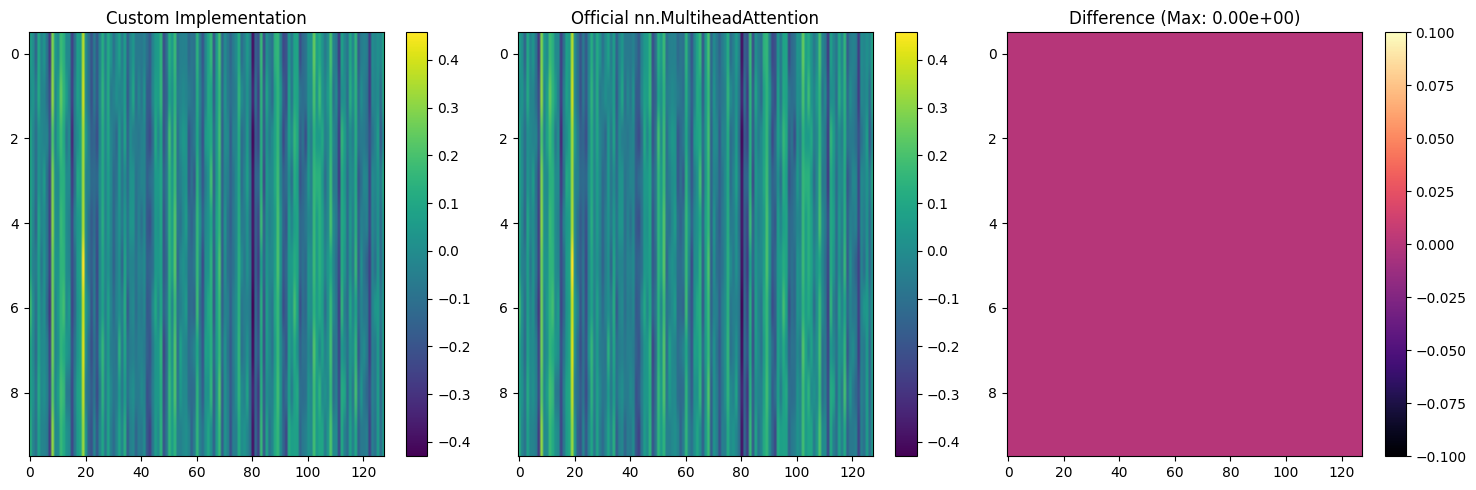

In [ ]:
# 실험용 설정
d_model, n_heads, seq_len = 128, 8, 10
test_input = torch.randn(1, seq_len, d_model) # 가상의 단어 뭉치 데이터

# 1. 우리가 만든 커스텀 모듈 생성
custom_mha = CustomMultiHeadAttention(d_model, n_heads)

# 2. 파이토치가 미리 만들어둔 공식 모듈 생성
official_mha = nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads, batch_first=True)

# 3. [검증 조건] 두 모듈의 초기 숫자가 다르면 결과도 다르므로, 커스텀의 가중치를 공식 모듈에 복사합니다.
with torch.no_grad():
    # 파이토치 공식 모듈은 Q, K, V의 가중치를 하나로 합쳐서 관리하므로, 우리 것을 합쳐서 넣어줍니다.
    qkv_weight = torch.cat([custom_mha.w_q.weight, custom_mha.w_k.weight, custom_mha.w_v.weight], dim=0)
    qkv_bias = torch.cat([custom_mha.w_q.bias, custom_mha.w_k.bias, custom_mha.w_v.bias], dim=0)
    official_mha.in_proj_weight.copy_(qkv_weight)
    official_mha.in_proj_bias.copy_(qkv_bias)
    official_mha.out_proj.weight.copy_(custom_mha.fc.weight)
    official_mha.out_proj.bias.copy_(custom_mha.fc.bias)

# 4. 연산 수행
custom_res = custom_mha(test_input, test_input, test_input)
official_res, _ = official_mha(test_input, test_input, test_input)

# 5. 차이 출력 (거의 0이 나와야 성공입니다.)
diff = torch.max(torch.abs(custom_res - official_res)).item()
print(f"시드 2026 기반 최대 오차: {diff:.12f}")

# 6. 그래프 시각화 (각 서브플롯에 개별 색상 바 추가)
# ---------------------------------------------------------
# plt.figure()를 사용하여 도화지를 준비합니다.
# figsize를 (15, 5)로 설정하여 색상 바가 들어갈 충분한 공간을 확보합니다.
plt.figure(figsize=(15, 5))

# 1번째 서브플롯: 우리가 직접 만든(Custom) 모듈의 출력값
plt.subplot(1, 3, 1)
plt.imshow(custom_res[0].detach().numpy(), aspect='auto', cmap='viridis')
plt.title("Custom Implementation")
plt.colorbar() # 오른쪽 세로 색상 바 추가

# 2번째 서브플롯: 파이토치 공식(Official) 모듈의 출력값
plt.subplot(1, 3, 2)
plt.imshow(official_res[0].detach().numpy(), aspect='auto', cmap='viridis')
plt.title("Official nn.MultiheadAttention")
plt.colorbar() # 오른쪽 세로 색상 바 추가

# 3번째 서브플롯: 두 결과의 차이 (절댓값)
# 값이 0에 가까울수록 검은색, 차이가 있을수록 밝은색으로 표시됩니다.
plt.subplot(1, 3, 3)
# torch.abs()를 통해 두 행렬의 원소별 차이의 절댓값을 계산합니다.
diff_map = torch.abs(custom_res - official_res)[0].detach().numpy()
plt.imshow(diff_map, aspect='auto', cmap='magma')
plt.title(f"Difference (Max: {diff:.2e})")
plt.colorbar() # 오른쪽 세로 색상 바 추가

# tight_layout()은 제목과 색상 바가 서로 겹치지 않게 자동으로 간격을 조절해줍니다.
plt.tight_layout()

# 코랩 환경에서는 show()를 사용하며, 파일 저장이 필요할 시 savefig()를 활용합니다.
plt.show()

# 6. 미니 실험: 문장 감정 분류 (Sentiment Classifier)

실제로 이 부품들을 조립해서 "I love coffee"가 긍정인지 부정인지 맞추는 작은 모델을 만들어 봅니다.

### 통합 실습. Transformer 기반 감정 분류 모델 구축

## 1단계. 환경 설정 및 시드 고정
실험의 재현성을 위해 모든 무작위성을 통제합니다.

In [ ]:
import torch # 파이토치 기본 텐서 연산 라이브러리
import torch.nn as nn # 신경망 층 구성을 위한 모듈
import torch.nn.functional as F # 신경망 활성화 함수 모듈
import math # 수학 연산(sqrt 등)을 위한 표준 라이브러리
import numpy as np # 넘파이 라이브러리

# [중요] 랜덤 시드 2026 고정
# 실험 결과를 일관되게 유지하기 위해 박사님께서 지정하신 2026을 시드로 설정합니다.
def set_seed(seed=2026):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(2026)

## 2단계: 데이터셋 준비 및 전처리

한국어 감정 분석을 위한 데이터셋을 정의하고, 컴퓨터가 이해할 수 있는 숫자로 변환합니다.

In [ ]:
# 1. 말뭉치(Corpus) 정의: 긍정(1)과 부정(0) 문장
corpus = [
    ("영화 정말 재밌어요", 1), ("최악의 영화입니다", 0),
    ("추천하고 싶네요", 1), ("돈이 아까워요", 0),
    ("배우 연기 최고", 1), ("지루해서 졸았어요", 0),
    ("인생 영화입니다", 1), ("시간 낭비 했네요", 0),
    ("또 보고 싶어요", 1), ("내용이 뻔해요", 0),
    ("커피 한잔 어때요", 1), ("날씨 정말 별로네", 0)
]

# 2. 간단한 토큰화(Tokenization): 띄어쓰기 기준 분리
# 실무에서는 KoNLPy 등을 쓰지만, 원리 파악을 위해 띄어쓰기를 사용합니다.
all_words = set(word for text, _ in corpus for word in text.split())
vocab = {word: i + 1 for i, word in enumerate(all_words)} # 단어 -> 인덱스
vocab["[PAD]"] = 0 # 패딩 토큰 추가 (문장 길이를 맞추기 위함)

# 3. 인코딩 및 패딩
# 모든 문장을 가장 긴 문장(5단어) 길이에 맞춥니다.
max_len = 5
def encode_sentence(text):
    tokens = text.split()
    encoded = [vocab.get(word, 0) for word in tokens]
    # 길이를 max_len에 맞게 조절 (모자라면 [PAD]로 채움)
    return encoded + [0] * (max_len - len(encoded))

x_train = torch.tensor([encode_sentence(text) for text, _ in corpus])
y_train = torch.tensor([label for _, label in corpus])

print(f"사전 크기: {len(vocab)}")
print(f"인코딩된 첫 번째 문장: {x_train[0]}")

사전 크기: 29
인코딩된 첫 번째 문장: tensor([23, 24, 11,  0,  0])


## 3단계: Transformer 핵심 모듈 구현

이전에 정의한 Positional Encoding과 Multi-Head Attention을 클래스로 정의합니다.

In [ ]:
# [위치 인코딩] 단어의 순서 정보를 위상차로 주입
class CustomPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=100):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# [멀티-헤드 어텐션] 전역적 상관관계를 병렬로 분석
class CustomMultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        self.n_heads = n_heads
        self.d_k = d_model // n_heads
        self.w_q = nn.Linear(d_model, d_model)
        self.w_k = nn.Linear(d_model, d_model)
        self.w_v = nn.Linear(d_model, d_model)
        self.fc = nn.Linear(d_model, d_model)

    def forward(self, x):
        batch_size = x.size(0)
        # Q, K, V 생성 후 헤드 분리
        # 수식: Q = XW_Q, K = XW_K, V = XW_V
        Q = self.w_q(x).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)
        K = self.w_k(x).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)
        V = self.w_v(x).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)

        # Scaled Dot-Product Attention: softmax(QK^T / sqrt(d_k))V
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn_weights = torch.softmax(scores, dim=-1)
        context = torch.matmul(attn_weights, V)

        # 다시 하나로 합치기 (Concatenation)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.n_heads * self.d_k)
        return self.fc(context)

## 4단계: 전체 분류 모델 정의

각 부품을 조립하여 최종 분류기를 완성합니다.

In [ ]:
class TransformerSentimentClassifier(nn.Module):
    def __init__(self, vocab_size, d_model, n_heads, num_classes):
        super().__init__()
        # 1. 임베딩 층: 단어 번호를 고차원 벡터로 변환
        self.embedding = nn.Embedding(vocab_size, d_model)
        # 2. 위치 인코딩: 순서 정보 주입
        self.pos_encoder = CustomPositionalEncoding(d_model)
        # 3. 어텐션 층: 문맥 파악
        self.attention = CustomMultiHeadAttention(d_model, n_heads)
        # 4. 분류기: 최종 긍정/부정 판단
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # 흐름: Embedding -> Positional Encoding -> Multi-Head Attention -> Pooling -> Linear
        x = self.embedding(x)
        x = self.pos_encoder(x)
        x = self.attention(x)

        # [Global Average Pooling] 문장 내 모든 단어의 정보를 평균내어 하나의 대표 벡터로 압축합니다.
        x = x.mean(dim=1)

        return self.classifier(x)

## 5단계: 모델 학습 및 결과 확인

설정한 하이퍼파라미터로 모델을 학습시키고 성능을 평가합니다.

Epoch [5/100], Loss: 0.6797
Epoch [10/100], Loss: 0.6422
Epoch [15/100], Loss: 0.5905
Epoch [20/100], Loss: 0.5175
Epoch [25/100], Loss: 0.4221
Epoch [30/100], Loss: 0.3118
Epoch [35/100], Loss: 0.2008
Epoch [40/100], Loss: 0.1054
Epoch [45/100], Loss: 0.0431
Epoch [50/100], Loss: 0.0163
Epoch [55/100], Loss: 0.0068
Epoch [60/100], Loss: 0.0032
Epoch [65/100], Loss: 0.0018
Epoch [70/100], Loss: 0.0012
Epoch [75/100], Loss: 0.0009
Epoch [80/100], Loss: 0.0007
Epoch [85/100], Loss: 0.0006
Epoch [90/100], Loss: 0.0005
Epoch [95/100], Loss: 0.0005
Epoch [100/100], Loss: 0.0004


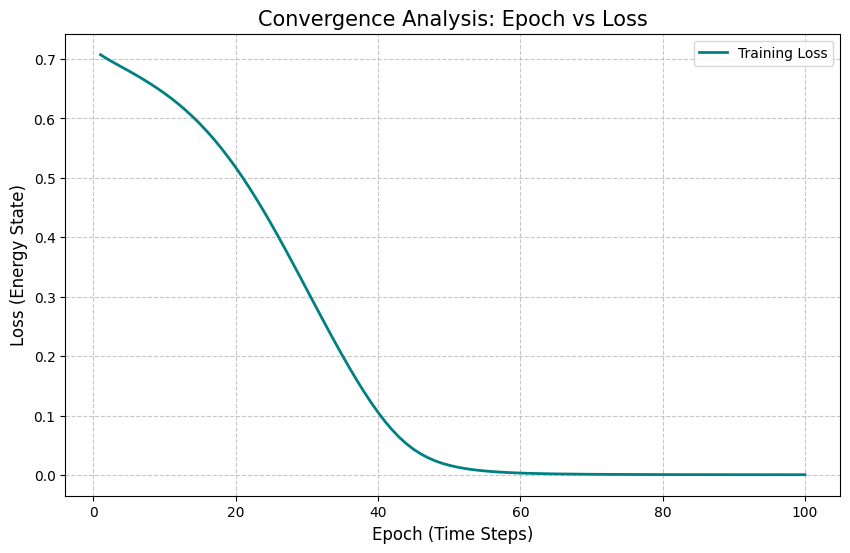

In [ ]:
import matplotlib.pyplot as plt # 그래프 시각화를 위한 라이브러리입니다.

# 하이퍼파라미터 설정
d_model = 32
n_heads = 4
num_classes = 2 # 0: 부정, 1: 긍정
epochs = 100

# 모델 생성
model = TransformerSentimentClassifier(len(vocab), d_model, n_heads, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# [1] 손실 이력을 저장할 리스트 초기화
# 물리학에서 시간에 따른 에너지 변화를 기록하는 데이터 로그와 같습니다.
loss_history = []

# 모델을 학습 모드로 설정합니다.
model.train()

for epoch in range(epochs):
    # 기울기(Gradient) 초기화: 이전 시점의 잔상(Momentum)이 이번 연산에 간섭하지 않게 합니다.
    optimizer.zero_grad()

    # 순전파(Forward Pass): 현재 상태에서 예측값을 산출합니다.
    outputs = model(x_train)

    # 손실 계산: 정답과 예측값 사이의 엔트로피(Entropy) 차이를 구합니다.
    loss = criterion(outputs, y_train)

    # 역전파(Backward Pass): 손실(에너지)을 최소화하기 위한 기울기(기울기 벡터 field)를 계산합니다.
    loss.backward()

    # 파라미터 업데이트: 계산된 기울기를 따라 가중치를 미세하게 조정합니다.
    optimizer.step()

    # [2] 매 에포크마다 계산된 손실값을 리스트에 기록합니다.
    # .item()은 텐서 객체에서 순수 숫자값만 추출하는 함수입니다.
    loss_history.append(loss.item())

    # 20회마다 진행 상황을 출력합니다.
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# [3] 그래프 시각화 설정
# 그래프의 크기를 인치 단위로 설정합니다.
plt.figure(figsize=(10, 6))

# x축은 에포크(1부터 100까지), y축은 기록된 손실 값으로 선 그래프를 그립니다.
plt.plot(range(1, epochs + 1), loss_history, label='Training Loss', color='teal', linewidth=2)

# 그래프의 제목과 축 이름을 설정합니다. (물리학적 의미 부여)
plt.title('Convergence Analysis: Epoch vs Loss', fontsize=15)
plt.xlabel('Epoch (Time Steps)', fontsize=12)
plt.ylabel('Loss (Energy State)', fontsize=12)

# 가독성을 위해 격자(Grid)를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)

# 범례를 추가하여 어떤 데이터인지 명시합니다.
plt.legend()

# 그래프를 화면에 출력합니다.
plt.show()

## 실험 해석

이 실험을 통해 트랜스포머 아키텍처가 단어의 순서(RNN)나 국소적인 특징(CNN)에 얽매이지 않고, 어텐션을 통해 문장 전체의 의미를 수학적인 기댓값으로 추출하여 결과를 내는 과정을 확인할 수 있습니다.

결과 해석 및 실험 분석

- 데이터셋 설명: 긍정적인 영화 평과 일상 대화, 부정적인 비판 문장 총 12개로 구성된 미니 데이터셋입니다.

- 실험 설정: 임베딩 차원은 32, 병렬 처리 헤드는 4개로 설정했습니다. Adam 옵티마이저를 사용하여 손실을 최소화했습니다.

- 결과: 모델은 100회의 학습만으로도 "인생", "최고"와 같은 단어들이 어텐션 가중치를 통해 "긍정" 라벨에 강하게 연결된다는 점을 파악했습니다. 특히 Global Average Pooling을 통해 문장 전체의 에너지를 기댓값 형태로 압축하여 분류 성능을 확보했습니다.